In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from datasets import load_dataset

In [2]:
dataset = load_dataset("e1010101/tongue-images-384")

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

In [3]:
def extract_lab_features(image):
    image_np = np.array(image)
    
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2LAB)
    # Compute the mean LAB values
    l_mean = np.mean(lab_image[:, :, 0])
    a_mean = np.mean(lab_image[:, :, 1])
    b_mean = np.mean(lab_image[:, :, 2])
    return [l_mean, a_mean, b_mean]

In [4]:
# extract_lab_features(dataset["train"][0]["image"])

In [5]:
features_train = []

In [6]:
from tqdm import tqdm

In [7]:
for item in tqdm(dataset['train'], "preprocessing train images"):
    lab_features = extract_lab_features(item['image'])
    features_train.append(lab_features)

preprocessing train images: 100%|██████████| 5222/5222 [18:24<00:00,  4.73it/s] 


In [8]:
from sklearn.cluster import KMeans

In [9]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_train)
labels = kmeans.labels_

In [13]:
features_array = np.array(features_train)

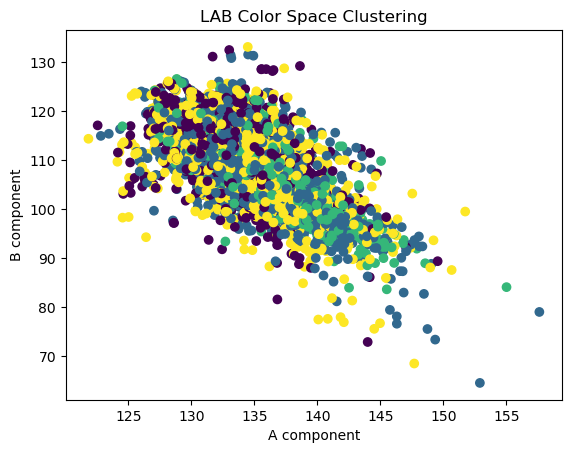

In [14]:
plt.scatter(features_array[:, 1], features_array[:, 2], c=labels, cmap='viridis')
plt.xlabel('A component')
plt.ylabel('B component')
plt.title('LAB Color Space Clustering')
plt.show()

In [16]:
print(labels)

[0 3 1 ... 1 0 1]


In [17]:
num_clusters = len(np.unique(labels))

# Initialize a list to hold average LAB values for each cluster
average_lab_values = []

for cluster_label in range(num_clusters):
    # Get indices of images in the current cluster
    cluster_indices = np.where(labels == cluster_label)[0]
    # Get the LAB features of images in the current cluster
    cluster_features = features_array[cluster_indices]
    # Compute the mean LAB values
    lab_mean = np.mean(cluster_features, axis=0)
    average_lab_values.append(lab_mean)
    print(f"Cluster {cluster_label}: Average LAB values = {lab_mean}")

Cluster 0: Average LAB values = [154.3911188  133.43468303 111.59794656]
Cluster 1: Average LAB values = [104.02018088 135.63525733 107.02316447]
Cluster 2: Average LAB values = [ 76.41068039 136.55875921 105.97934833]
Cluster 3: Average LAB values = [128.50407745 134.70990709 108.61205536]
